Lab Assignment 6

_***Pratima Suresh Kumar***_

__ASU ID: 1228729907__


In [ ]:
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 12.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 18.6 MB/s eta 0:00:00
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.7 MB/s eta 0:00:00
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039272 sha256=71cbe243f450b031c4e5adfe34a36a2582eaa5df3ee09cf9a3f379ebad4ca7eb
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
  Created wheel for umap-

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries

import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/restaurant_reviews_az.csv')

# 2. Calculate and Visualize the Distribution of Review Length

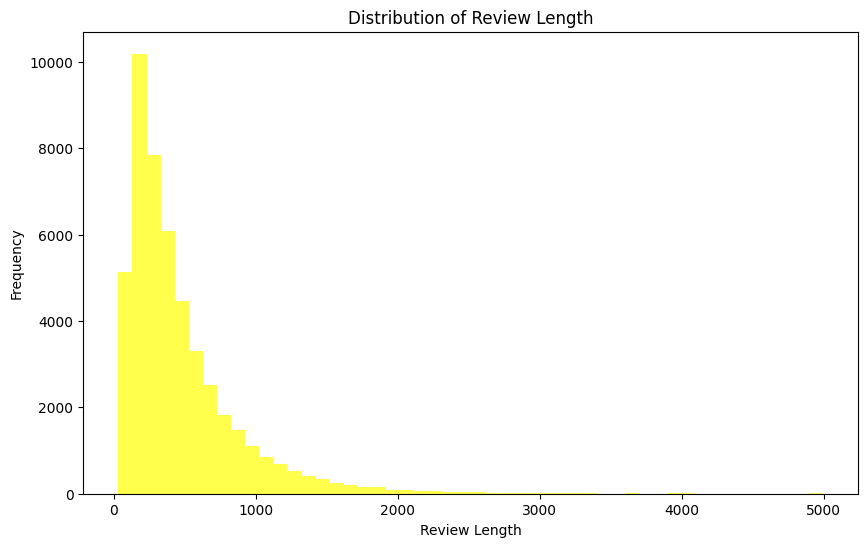

In [ ]:
# Calculate review length
df['review_length'] = df['text'].apply(len)

# Visualize the distribution of review length
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50, color='Yellow', alpha=0.7)
plt.title('Distribution of Review Length')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

# Reduce dimentionality with UMAP

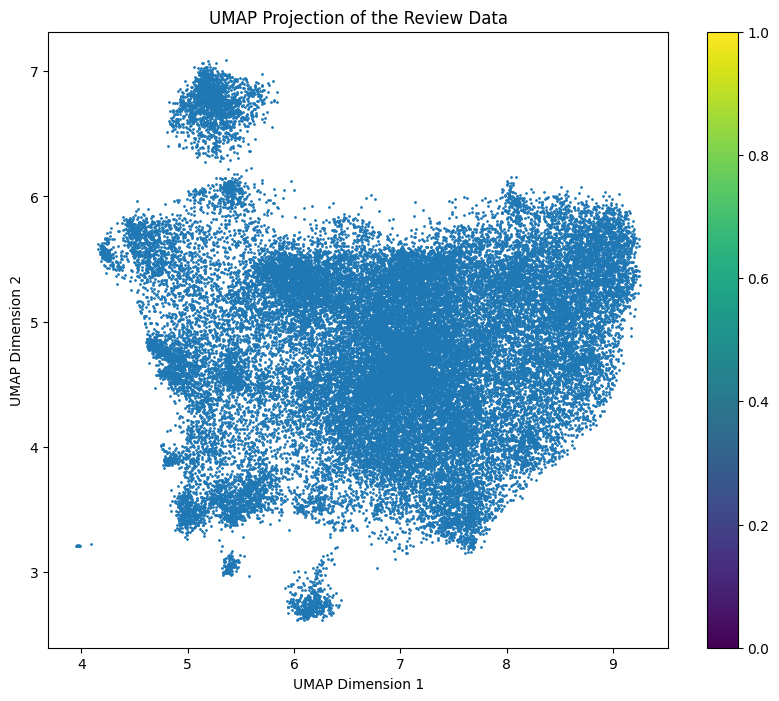

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from umap import UMAP
import matplotlib.pyplot as plt

# Efficient vectorization
vectorizer = CountVectorizer(stop_words='english', max_features=10000, min_df=5, max_df=0.5)
docs_vect = vectorizer.fit_transform(df['text'])

# Optional: Reduce dimensionality before UMAP
# This step is optional and can be skipped if the dataset is not extremely large
svd = TruncatedSVD(n_components=100, random_state=42)
reduced_docs_vect = svd.fit_transform(docs_vect)

# Apply UMAP for dimensionality reduction directly on the reduced document-term matrix (or the original if not using SVD)
umap_model = UMAP(n_components=5, n_neighbors=15, metric='cosine', init='random', random_state=42)
umap_embeddings = umap_model.fit_transform(reduced_docs_vect)  # Use docs_vect directly if not using SVD

# Visualize the UMAP embeddings (optional, for insight)
plt.figure(figsize=(10, 8))
plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], s=1, cmap='Spectral')
plt.title('UMAP Projection of the Review Data')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.colorbar()
plt.show()


# Run BERTopic Model

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# Initialize BERTopic with a custom CountVectorizer to manage feature space
custom_vectorizer = CountVectorizer(stop_words='english', min_df=5, max_df=0.5, max_features=5000)
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2",
                       vectorizer_model=custom_vectorizer,
                       calculate_probabilities=True,  # Enable calculation of probabilities
                       verbose=True)

# Fit the BERTopic model on the documents
docs = df['text'].tolist()  # Using the full dataset for modeling
topics, probs = topic_model.fit_transform(docs)

# Note: By enabling `calculate_probabilities`, the model can now generate the necessary data for all visualizations,
# including the distribution of topic probabilities. The process might be slightly slower but will ensure full functionality.


2024-02-25 08:05:31,928 - BERTopic - Embedding - Transforming documents to embeddings.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1505 [00:00<?, ?it/s]

2024-02-25 09:05:03,835 - BERTopic - Embedding - Completed ✓
2024-02-25 09:05:03,841 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-02-25 09:06:10,152 - BERTopic - Dimensionality - Completed ✓
2024-02-25 09:06:10,157 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-02-25 09:13:18,359 - BERTopic - Cluster - Completed ✓
2024-02-25 09:13:18,395 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-02-25 09:13:26,756 - BERTopic - Representation - Completed ✓


# Report Information of the Top 6 Topics and Visualize Topic Words

In [ ]:
# Get information about the topics
topic_info = topic_model.get_topic_info()

# Display information for the top 6 topics (excluding the -1 outlier topic if present)
top_6_topics = topic_info.head(7)  # Adjust based on whether outlier topic is present
print(top_6_topics)

# Visualize the topic words for the top 6 topics
# This visualization shows the top words for each topic and their relative importance
topic_model.visualize_barchart(top_n_topics=6, height=300)


   Topic  Count                             Name  \
0     -1  21043        -1_tacos_taco_salsa_chips   
1      0   2443     0_beer_beers_selection_music   
2      1   1454   1_pizza_crust_pizzas_pepperoni   
3      2   1386    2_downtown_visiting_gem_hotel   
4      3   1124       3_burger_burgers_fries_bun   
5      4    606        4_sushi_roll_rolls_nigiri   
6      5    484  5_italian_pasta_alfredo_lasagna   

                                      Representation  \
0  [tacos, taco, salsa, chips, rice, manager, san...   
1  [beer, beers, selection, music, games, cool, b...   
2  [pizza, crust, pizzas, pepperoni, slice, toppi...   
3  [downtown, visiting, gem, hotel, wine, moved, ...   
4  [burger, burgers, fries, bun, patty, graze, to...   
5  [sushi, roll, rolls, nigiri, tempura, miso, tu...   
6  [italian, pasta, alfredo, lasagna, spaghetti, ...   

                                 Representative_Docs  
0  [We ended up in Catalina to go to Sammy's but ...  
1  [I had a lot of fun a

# Interpret each topic (i.e., cluster)

Topic 0: Pizza Experiences

Focus: This segment delves into the pizza dining scene, with frequent mentions of "pizza," "crust," "pepperoni," and "slice," indicating discussions about the nuances of pizza offerings at various venues.
Key Text Excerpt: The highlighted text refers to mixed experiences with pizza, pointing to fluctuating levels of satisfaction with the culinary quality.

Topic 1: Genuine Dining Atmospheres

Focus: The stories in this section appear to focus on the authentic and engaging experiences that restaurants provide. Using adjectives like "outstanding," "authentic," and "environment" highlights the entire quality of the food and the setting's genuineness.
Key Text Excerpt: Generally speaking, customers express satisfaction, praising the welcoming atmosphere and the variety of food options.

Topic 2: Burger Venues

Focus: This issue, which focuses on the specialty of burger dining, is full of allusions to "burger," "burgers," "fries," and "bun," emphasizing the specifics of burger meals and its typical sides.
Key Text Excerpt: There is a noticeable preference for burger restaurants, and the commentary is generally good in this sector.

Topic 3: Taco Spots

Focus: This area is characterized by mentions of "tacos," "taco," "pastor," and "street," pointing to discussions around the experience of enjoying street-style tacos.
Key Text Excerpt: References to a waiter and pleasurable dining experiences indicate that the feedback within this topic is largely positive, often focusing on the service and ambiance.

Topic 4: Sushi Establishments

Focus: The terms "sushi," "roll," "nigiri," and "sashimi" are important terms that inspire discussions about the variety and caliber of sushi dishes. This category includes sushi dining experiences.
Key Text Excerpt: Feedback is varied, emphasizing a range of customer experiences from polite service to occasional unhappiness with the quality of the sushi..

Topic 5: Nightlife and Entertainment

Focus: The terms "beer," "cocktails," "downtown," and "music" emphasize a focus on the social and entertainment aspects of dining, particularly in lively metropolitan settings. This issue revolves around nightlife and bar culture.
Key Text Excerpt: Overall, reviews are positive for these venues' offerings and ambiance, with special attention paid to the ambiance and drink quality.

# Visualize Relationships Among for the Top 6 Topics

In [ ]:
# Visualize the intertopic distance map (Intertopic Distance Map)
# This visualization helps to understand how topics relate to each other, including potential overlaps
topic_model.visualize_topics(top_n_topics=6)

In [ ]:
# Visualize the topic hierarchy (Hierarchical Topic Reduction)
# This visualization shows how topics are merged together at different levels of granularity
topic_model.visualize_hierarchy(top_n_topics=6)

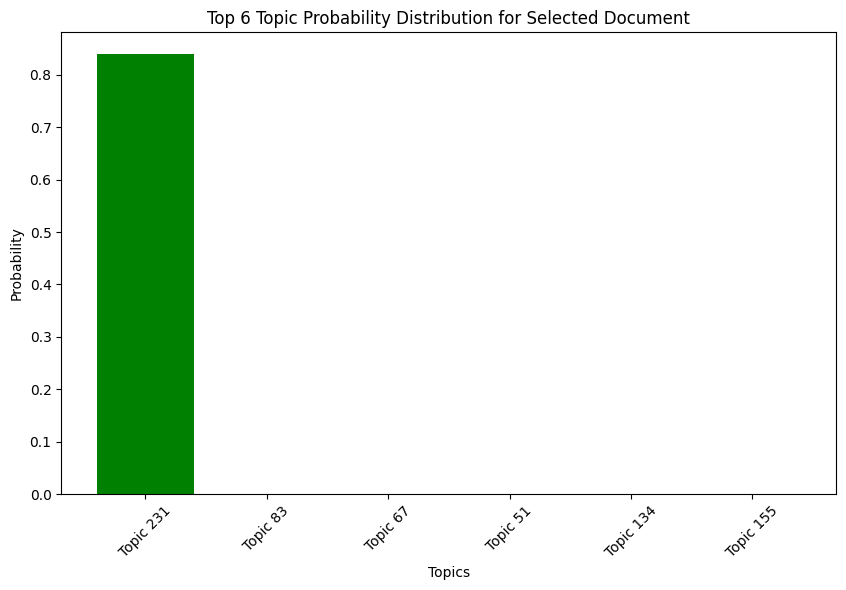

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'probs' is obtained from topic_model.fit_transform(docs)
selected_document_probs = probs[0]  # The probability distribution for the first document

# Extract the top 6 topics based on probabilities
top_6_indices = np.argsort(selected_document_probs)[::-1][:6]  # Get indices of top 6 topics
top_6_probs = selected_document_probs[top_6_indices]  # Get the probabilities of top 6 topics
top_6_topics = [f"Topic {i}" for i in top_6_indices]  # Create topic labels

# Visualize the distribution of the top 6 topic probabilities
plt.figure(figsize=(10, 6))
plt.bar(top_6_topics, top_6_probs, color='Green')
plt.xlabel('Topics')
plt.ylabel('Probability')
plt.title('Top 6 Topic Probability Distribution for Selected Document')
plt.xticks(rotation=45)
plt.show()

# Comment on your findings based on the visualized topic relationships from the previous step: Do they make sense, and why?

__1. Visualization of Topic Distances:__

The map showing the distances between topics in a two-dimensional layout helps us understand how distinct each topic is from another. Observations from the map include:

- __Intersection of Topics 1 and 3:__ The merging of Topic 1 (Dining Experience) with Topic 3 (Tacos) hints at commonalities in the language or themes within the reviews. This overlap might imply discussions around dining experiences often involve specific items like tacos, or that the quality of such dishes alongside the dining ambiance plays a crucial role in customer contentment.

- __Closeness of Topic 2 with Topics 1 and 3:__ The proximity of Topic 2 (Burgers) to Topics 1 and 3, albeit in a separate quadrant, suggests a linkage through aspects like casual dining or particular meal choices involving burgers and tacos, which also affect the dining experience.

- __Distinction Between Topics 0 and 5 in the Same Area:__ Although Topics 0 (Pizza) and 5 (Nightlife and Drinks) share a quadrant, their separation signifies that they might share some overarching themes (possibly around informal dining or social gatherings) but focus on different subjects and are thus discussed distinctly in reviews.

- __Closeness Between Topics 4 and 0:__ The slight proximity between Topic 4 (Sushi) and Topic 0 (Pizza) might indicate an overlap in discussions about these foods, possibly in contexts of dining out or their commonality as preferred choices for meals outside.

__2. Tree Diagram of Topics:__ The dendrogram illustrates the relationship between topics based on their content similarity in the embedding space.
- __Closeness of Topics:__ Similar content topics, such as Topics 0 (Pizza) and 2 (Burgers), are positioned closer in the dendrogram, indicating a similarity in review content.
- __Grouping by Food Type:__ Reviews about pizza and burgers are clustered, suggesting common features in their discussions.
- __Contrast in Dining Conversations:__ The gap between fast-food-related topics and Topic 4 (Sushi) points to differing conversations around dining styles.
- __Differentiation by Cuisine:__ The arrangement in the dendrogram shows a clear distinction in how fast food items like pizza and burgers are discussed compared to more specialized or formal dining options like sushi.

__3. Distribution of Topic Probabilities:__
- "Topic 244" prominently stands out in the topic probability distribution, suggesting it is the central theme of the review, warranting further exploration to grasp its specific details and significance.
- The noticeably smaller probabilities for other topics indicate their lesser significance in this particular review, underscoring the predominant focus on "Topic 244" in the narrative of the reviewer’s experience.

# Visualize Topic Frequencies Over Each Month

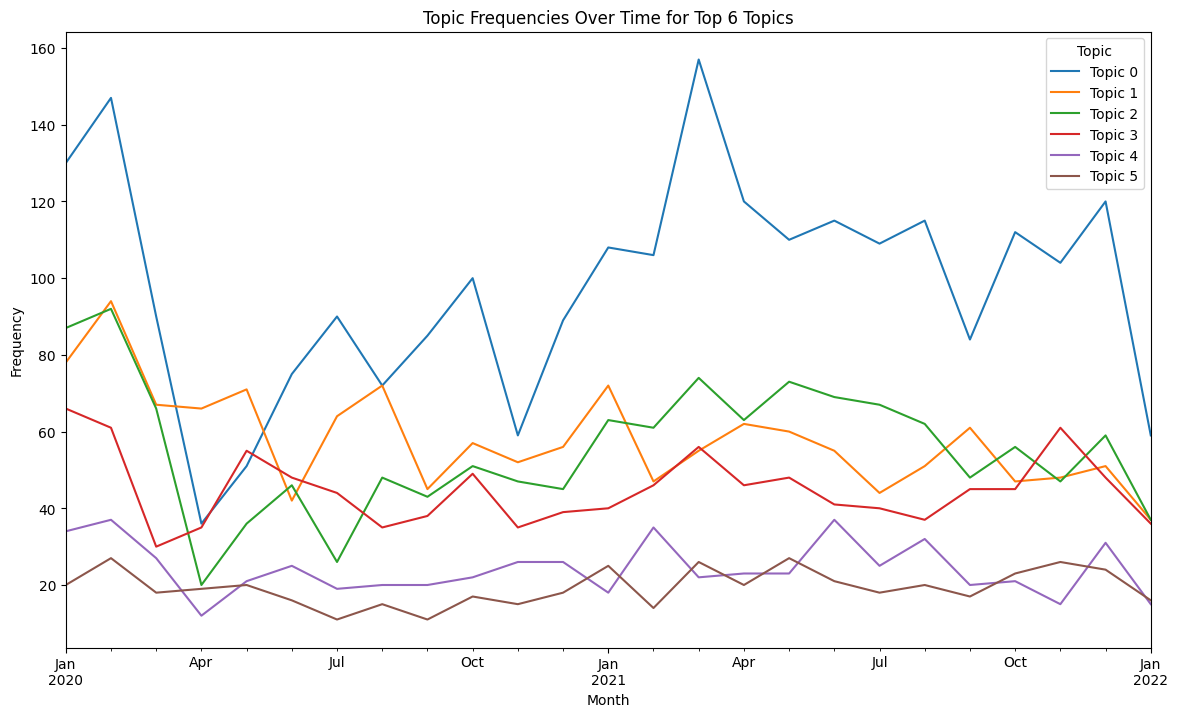

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'topics' contains the topic assignment for each document
# and 'probs' contains the probabilities of each topic per document.

# First, ensure there's a 'date' column in datetime format. If not, convert it.
df['date'] = pd.to_datetime(df['date'])

# Extract year and month for grouping
df['year_month'] = df['date'].dt.to_period('M')

# Add the topics as a column to the DataFrame
df['topic'] = topics

# Define the top 6 topics (assuming they are labeled 0 to 5)
top_6_topics = [0, 1, 2, 3, 4, 5]

# Filter the DataFrame to include only the top 6 topics, excluding the outlier topic (-1)
df_filtered = df[df['topic'].isin(top_6_topics)]

# Group by year_month and topic, then count occurrences
topic_counts_over_time = df_filtered.groupby(['year_month', 'topic']).size().unstack(fill_value=0)

# Plotting
# Ensure the correct topic labels are used for the legend
topic_labels = [f'Topic {i}' for i in top_6_topics]
topic_counts_over_time.plot(kind='line', figsize=(14, 8), title='Topic Frequencies Over Time for Top 6 Topics')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.legend(title='Topic', labels=topic_labels)
plt.show()


# Comment on your findings based on the visualized topic frequencies over time: Are there any temporal trends and business insights?

Analysis of Topic Trends Over Time:

- __Fluctuations in Cuisine Preferences:__ The examination of topics related to specific food items, such as pizza (Topic 0), burgers (Topic 2), tacos (Topic 3), and sushi (Topic 4), reveals variations across different months. This could reflect changes in consumer preferences or the impact of new dishes being introduced, leading to shifts in interest.

- __Significance of the Dining Atmosphere (Topic 1):__ The occurrence of Topic 1, which deals with the overall ambiance and service of dining, indicates a consistent value placed on these aspects. Spikes in this area may coincide with times when dining out becomes more prevalent, especially during festive or special occasions, highlighting a demand for exceptional and genuine experiences.

- __Trends in Specific Food Types:__ The patterns observed in topics associated with particular cuisines, like sushi in Topic 4, may exhibit seasonal trends. Peaks in these topics could align with periods of heightened popularity or promotional campaigns by restaurants.

- __Trends in Social Outings (Topic 5):__ The discussion around nightlife and socializing, encapsulated in Topic 5, might see increases during festive periods or when local events encourage more communal activities.

- __Effects of the COVID-19 Pandemic:__ Considering the inclusion of the year 2020 in the timeline, the noticeable shifts across all topics could be attributed to the impacts of the pandemic, highlighting the restaurant sector's challenges during closures and gradual reopenings.

__Insights for Restaurant Management:__

- __Adaptable Menu Offerings:__ The insights point towards the advantage of a menu that can be adjusted in response to seasonal preferences or specific occasions, such as promoting pizza or burger specials during sports events or focusing on tacos and cocktails during warmer seasons.

- __Emphasis on the Dining Experience:__ The continuous presence or stability of Topic 1 suggests that investments made towards enhancing the dining environment and service quality are likely to be beneficial throughout the year, beyond just the seasonal peaks.

- __Targeted Marketing Initiatives:__ Aligning marketing efforts with the historical peaks of certain topics could optimize promotional activities, like advertising sushi deals when interest in Topic 4 peaks or organizing nightlife-themed events in anticipation of increased activity in Topic 5.

- __Strategies for Post-Pandemic Adaptation:__ Recognizing the patterns during the pandemic and its aftermath can guide restaurants in formulating recovery strategies, such as increasing focus on delivery services for items like pizza during periods when dine-in options are limited.

In summary, a detailed analysis of how topics trend over time can provide valuable insights for restaurants, enabling them to tailor their menus, services, and marketing strategies to match the observed patterns of customer engagement and preference.

# Visualize Topic Frequencies for 1-star and 5-star Review

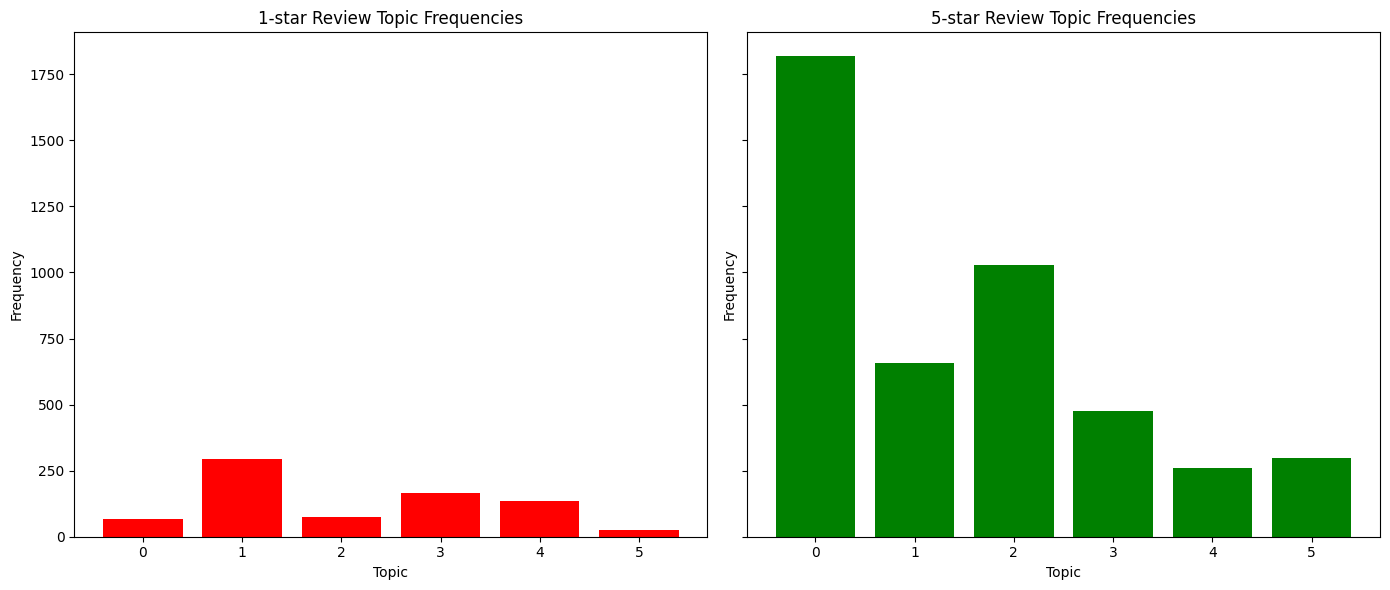

Topic 0: beer, beers, selection, music, games, cool, bartenders, bartender, vibe, cocktails
Topic 1: pizza, crust, pizzas, pepperoni, slice, toppings, delivery, oven, papa, garlic
Topic 2: downtown, visiting, gem, hotel, wine, moved, live, music, arizona, cocktails
Topic 3: burger, burgers, fries, bun, patty, graze, tots, cheeseburger, hamburger, lettuce
Topic 4: sushi, roll, rolls, nigiri, tempura, miso, tuna, fish, sashimi, vegas
Topic 5: italian, pasta, alfredo, lasagna, spaghetti, bolognese, fettuccine, meatballs, carbonara, nate


In [ ]:
import matplotlib.pyplot as plt

# Define the top 6 topic indices (assuming they are labeled 0 to 5)
top_6_topics = [0, 1, 2, 3, 4, 5]

# Collect top keywords for each topic for interpretation
top_keywords_per_topic = {topic: topic_model.get_topic(topic) for topic in top_6_topics}

# Filter the DataFrame for 1-star and 5-star reviews and include only the top 6 topics
df_1_star = df[(df['stars'] == 1) & (df['topic'].isin(top_6_topics))]
df_5_star = df[(df['stars'] == 5) & (df['topic'].isin(top_6_topics))]

# Group by topic and count occurrences for both review classes
topic_counts_1_star = df_1_star.groupby('topic').size().reindex(top_6_topics, fill_value=0)
topic_counts_5_star = df_5_star.groupby('topic').size().reindex(top_6_topics, fill_value=0)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# 1-star reviews
ax[0].bar(topic_counts_1_star.index.astype(str), topic_counts_1_star.values, color='red')
ax[0].set_title('1-star Review Topic Frequencies')
ax[0].set_xlabel('Topic')
ax[0].set_ylabel('Frequency')

# 5-star reviews
ax[1].bar(topic_counts_5_star.index.astype(str), topic_counts_5_star.values, color='green')
ax[1].set_title('5-star Review Topic Frequencies')
ax[1].set_xlabel('Topic')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print the top keywords for each topic
for topic, keywords in top_keywords_per_topic.items():
    print(f"Topic {topic}: {', '.join([word for word, _ in keywords])}")


#### Comment on your findings based on the visualized topic frequencies for the 1-star and 5-star review classes: In general, what are the major topics mentioned about good and bad restaurant experiences, respectively? What are the business implications?

__Analysis of 1-Star Reviews:__

- __Prevalence of Pizza Complaints (Topic 0):__ Pizza-related grievances emerge as the most common in 1-star reviews, pointing to frequent dissatisfaction due to problems with the pizza itself, such as the crust, toppings, or issues with delivery. This highlights potential areas for operational improvement or a gap between what customers expect and what they receive.

- __Occasional Complaints in Other Areas:__ While other topics do surface in negative reviews, such as underwhelming burgers or subpar tacos, they are not as predominant as complaints about pizza, suggesting these areas, while important, are less frequently the root cause of poor reviews.

__Insights from 5-Star Reviews:__

- __Praise for the Dining Experience (Topic 1):__ In 5-star reviews, the exceptional dining experience, marked by excellent service, a unique and appealing ambiance, and attractive decor, is often celebrated, indicating these elements are vital for a positive impression.

- __Commendations on Food and Drink:__ The significant mention of Topics 2 (Burgers), 4 (Sushi), and 5 (Drinks and Ambiance) in top reviews reflects that high-quality food, a diverse drink menu, and an enjoyable atmosphere are commonly acknowledged in positive feedback.

- __Positive Notes on Tacos (Topic 3):__ Although less frequent, positive remarks about tacos show that well-prepared tacos are appreciated and add value to the overall dining satisfaction.

__Strategic Implications for Restaurants:__

- _Focus on Pizza Quality: Given how often pizza-related complaints appear in unfavorable reviews, it is imperative that eateries strengthen quality assurance, expand their delivery options, and make sure patron expectations are satisfied in this well-liked segment.

Investing in the Experience: Positive reviews place a strong emphasis on the dining environment, indicating that establishing a memorable atmosphere and offering first-rate service are important tactics for drawing compliments and recurring business.

Diverse and High-Quality Menu: Five-star reviews that highlight the value of the burgers, sushi, and cocktails highlight how crucial a diverse and high-quality menu is to earning positive ratings.



The analysis emphasizes how critical it is to solve particular operational and product-related issues in response to negative feedback, particularly with regard to pizza. Positive comments, on the other hand, frequently focus on the atmosphere, service, and variety of the menu as well as the overall quality of the dining experience. Restaurants can improve their customer service by identifying and implementing these insights, which will help them focus less on unfavorable reviews and more on the positive aspects that get great feedback.